In [7]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv("https://raw.githubusercontent.com/arib168/data/main/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
x=df.iloc[:,[3,4]].values

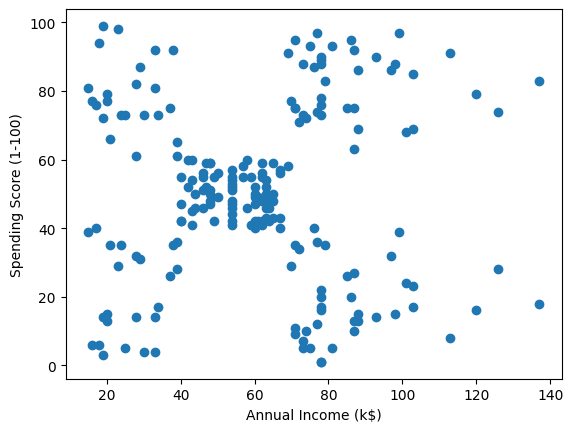

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [11]:
import numpy as np
np.sqrt(200)
# k value / number of clusters must be between 2 to sqrt of the no. of elements in the df ( here between 2 to 14)

np.float64(14.142135623730951)

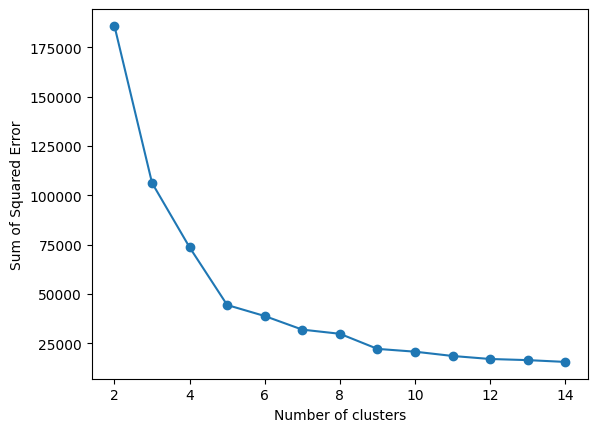

In [14]:
#elbow method to find the best number of clusters for this data
from sklearn.cluster import KMeans
k=range(2,15)
sse=[]
for i in k:
  model_demo=KMeans(n_clusters=i,random_state=0)
  model_demo.fit(x) #we get sse value
  sse.append(model_demo.inertia_)
plt.scatter(k,sse)
plt.plot(k,sse)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Error')
plt.show()

In [15]:
model_demo.inertia_ #measures how well the data set was clusttered by Kmeans

15599.148331445116

In [16]:
sse

[185917.1425392853,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 38858.959975143895,
 31969.42655023547,
 29858.48359760394,
 22209.851608025536,
 20786.936692059153,
 18612.222868009685,
 17083.67250170931,
 16511.947370563892,
 15599.148331445116]

In [17]:
#let us assume K=5 now
from sklearn.metrics import silhouette_score # evaluates the quality of the clusters created
#measure of how close each cluster point is wrt to the neighboring cluster point close to one is best

2 Clusters, Score=0.3848654187182249
3 Clusters, Score=0.46761358158775435
4 Clusters, Score=0.4931963109249047
5 Clusters, Score=0.553931997444648
6 Clusters, Score=0.45705720010448403
7 Clusters, Score=0.45485522128402084
8 Clusters, Score=0.46072786639159125
9 Clusters, Score=0.4578527068857916
10 Clusters, Score=0.4221740515026349
11 Clusters, Score=0.4214357152930456
12 Clusters, Score=0.40598959614312446
13 Clusters, Score=0.3931580457193786
14 Clusters, Score=0.3848587883658634


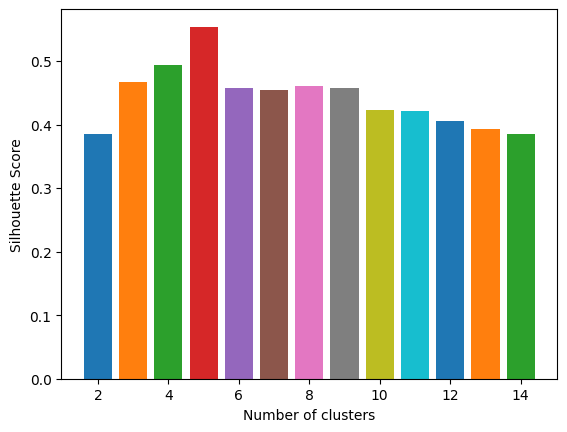

In [18]:
k=range(2,15)
for i in k:
  model_demo=KMeans(n_clusters=i,random_state=0)
  model_demo.fit(x)
  y=model_demo.predict(x)
  model_demo.predict(x)
  print(f"{i} Clusters, Score={silhouette_score(x,y)}")
  plt.bar(i,silhouette_score(x,y))
  plt.xlabel('Number of clusters')
  plt.ylabel('Silhouette Score')
plt.show()

In [19]:
#let us assume K=5 now,because silhoutte score is most arround 5
k=5
from sklearn.cluster import KMeans
model=KMeans(n_clusters=k,random_state=0)
model.fit(x)
y=model.predict(x)
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [20]:
len(y)

200

In [21]:
silhouette_score(x,y)


np.float64(0.553931997444648)

In [22]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([81, 39, 35, 23, 22]))

In [23]:
x[y==0,0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76])

In [24]:
x[y==1,0]

array([ 69,  70,  71,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,
        78,  78,  78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,
        88,  88,  93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137])

In [25]:
x[y==2,0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137])

In [26]:
x[y==3,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39])

In [27]:
x[y==4,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39])

In [28]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

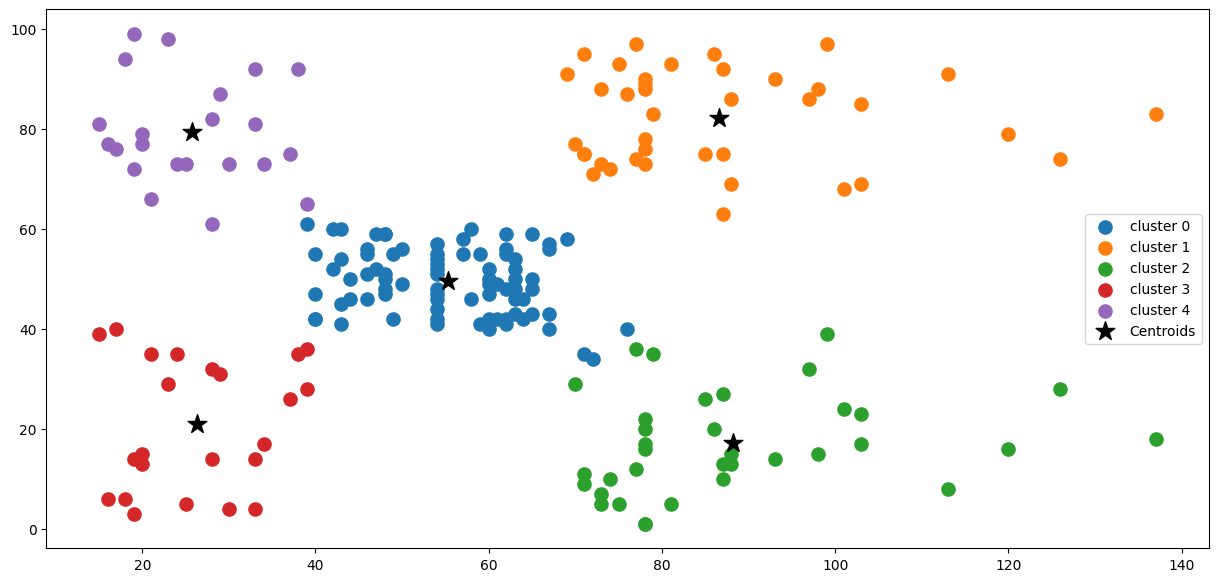

In [29]:
plt.figure(figsize=(15,7))
for i in range(k):
  plt.scatter(x[y==i,0],x[y==i,1],s=90,label=f'cluster {i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],label='Centroids',s=200,marker='*',c='black')
plt.legend()
plt.show()